# 2nd NPL model by Angelo Mauro Calderon

I will work in this project with Natural Processing Languaje for a Sarcasm Detection model using a dataset taken from:
Kaggle: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection

This file contains a lot of twitter's recompilation wich many comments has a Sarcastic intenction and I will look for a solution to how identify these sarcastics comments trying to study this phenomenon.

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Angel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Angel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# EDA

In [2]:
dataset = pd.read_json('Downloads\sarcasm_dataset\Sarcasm_Headlines_Dataset.json' , lines = True)
dataset.sample(10)

,article_link,headline,is_sarcastic
5496,https://www.huffingtonpost.com/entry/georgia-p...,georgia to provide planned parenthood with fre...,0
26166,https://politics.theonion.com/epa-didnt-know-a...,epa didn't know anybody was still drinking water,1
6565,https://www.theonion.com/report-92-of-american...,report: 92% of americans would have gotten ove...,1
22254,https://local.theonion.com/couple-dressed-as-m...,couple dressed as mario and luigi drunkenly ma...,1
16801,https://www.huffingtonpost.com/entry/premature...,air pollution linked to millions of premature ...,0
3441,https://www.huffingtonpost.com/entry/the-ultim...,the ultimate goal in grief: embracing a new life,0
952,https://www.huffingtonpost.comhttps://www.wash...,"george will trashes bill o'reilly: 'wise, he i...",0
26336,https://www.theonion.com/congolese-rebel-cant-...,congolese rebel can't bring himself to care ab...,1
2053,https://www.huffingtonpost.com/entry/patton-os...,patton oswalt brings late wife's newly publish...,0
23427,https://politics.theonion.com/fbi-raids-michae...,fbi raids michael cohen's office to get closer...,1


I can see that this dataset has a binary feature named 'is_sarcastic' given 1 equals 'yes' and 0 equals 'no' so I will 

Dataset's form:

In [3]:
dataset.shape

(26709, 3)

I will choose a random instance and analize the respective comment:

In [4]:
index_random = np.random.randint( 0 , high = dataset.shape[0])
header = dataset.iloc[index_random].headline
print(index_random , header)

3822 marriage equality, but what about divorce?


Is this a sarcastic comment?
I will comprove this text calling it based its 'is_sarcastic' column value.

In [5]:
print(index_random , dataset.iloc[index_random].is_sarcastic)

3822 0


for example, the previous text is not a sarcastic comment.

Null values?



In [6]:
dataset.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


duplicated values?


In [8]:
dataset['headline'].duplicated().sum()

107

I will drop out all the duplicated values

In [9]:
dataset = dataset.drop(dataset[dataset['headline'].duplicated()].index , axis = 0)

In [10]:
dataset['headline'].duplicated().sum()

0

I will check the 'is_sarcastic' column's distribution

C:\Users\Angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


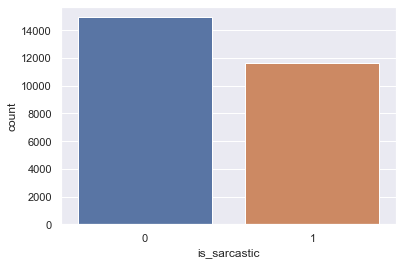

In [11]:
sns.countplot(dataset.is_sarcastic)
plt.show()

I am going to aggrupate all the unique binary values creating a dataframe for each one.

# Tokenize and drop out stopwords

Let's start with NO-SARCASM:

In [12]:
filterr = []

if True:
    filterr.append('u')
    filterr.append('new')

In [13]:
data_no_sarcasm = dataset[dataset.is_sarcastic == 0]
data_no_sarcasm.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0


I will specify two empty lists an then adding one per one value according to its headline's content already tokenized and the stopwords filtered:

In [14]:
stopwords = nltk.corpus.stopwords.words('english')

In [15]:
all_no_sarcasm_headline = []

for i in range(data_no_sarcasm.shape[0]):
    headln = data_no_sarcasm.iloc[i].headline
    headln = nltk.tokenize.RegexpTokenizer('[\w]+').tokenize(headln)
    headln = [word for word in headln if word not in stopwords]
    headln = [word for word in headln if word not in filterr]
    
    all_no_sarcasm_headline.append(headln)
    

In [16]:
all_no_sarcasm_headline = list(itertools.chain(*all_no_sarcasm_headline))
all_no_sarcasm_headline[0:10]

['former',
 'versace',
 'store',
 'clerk',
 'sues',
 'secret',
 'black',
 'code',
 'minority',
 'shoppers']

Now, order by frequency distribution of each word...

In [17]:
freq_no_sarcasm = nltk.FreqDist(all_no_sarcasm_headline)
freq_no_sarcasm

FreqDist({'trump': 1446, 'donald': 458, 'says': 349, 'women': 305, 'one': 268, 'year': 244, 'first': 242, 'world': 241, 'man': 241, 'people': 241, ...})

and transform that frequency into dataframe

In [18]:
df_no_sarcasm = pd.DataFrame(list(freq_no_sarcasm.items()), columns = ['Word' , 'Frequency'])
df_no_sarcasm.head()

,Word,Frequency
0,former,82
1,versace,1
2,store,14
3,clerk,5
4,sues,15


order the frequency's word values:

In [19]:
df_no_sarcasm.sort_values('Frequency' , ascending = False , inplace = True)
df_no_sarcasm.head()

,Word,Frequency
46,trump,1446
229,donald,458
421,says,349
29,women,305
258,one,268


...and reset all the index values

In [20]:
df_no_sarcasm.reset_index(drop = True , inplace = True)
df_no_sarcasm.head()

,Word,Frequency
0,trump,1446
1,donald,458
2,says,349
3,women,305
4,one,268


I am interested to visualize it...

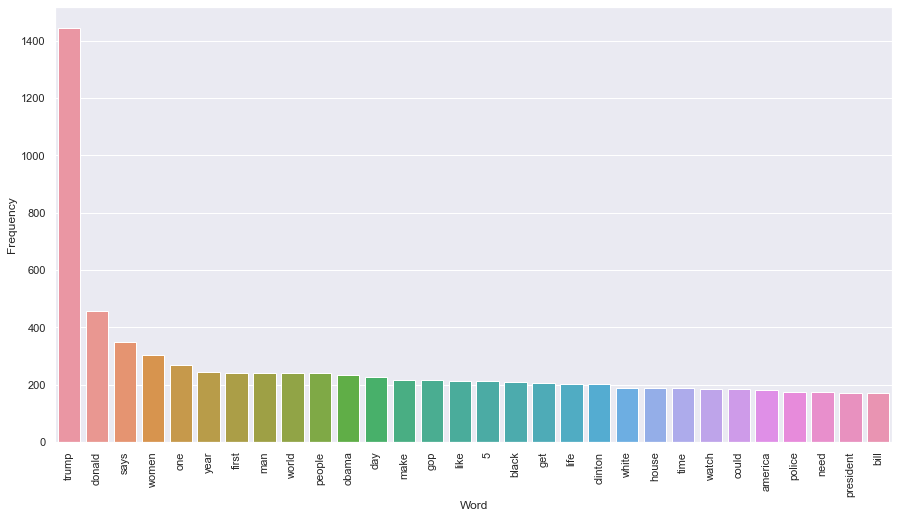

In [21]:
plt.figure(figsize = (15 , 8))
plot = sns.barplot( x = df_no_sarcasm.iloc[:30].Word , y = df_no_sarcasm.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

Secondly, the same transform way for SARCASM:

In [22]:
data_sarcasm = dataset[dataset.is_sarcastic == 1]
data_sarcasm.head()

,article_link,headline,is_sarcastic
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
15,https://entertainment.theonion.com/nuclear-bom...,nuclear bomb detonates during rehearsal for 's...,1
16,https://www.theonion.com/cosby-lawyer-asks-why...,cosby lawyer asks why accusers didn't come for...,1


In [23]:
all_sarcasm_headline = []

for i in range(data_sarcasm.shape[0]):
    headln = data_sarcasm.iloc[i].headline
    headln = nltk.tokenize.RegexpTokenizer('[\w]+').tokenize(headln)
    headln = [word for word in headln if word not in stopwords]
    headln = [word for word in headln if word not in filterr]
    
    all_sarcasm_headline.append(headln)

In [24]:
all_sarcasm_headline = list(itertools.chain(*all_sarcasm_headline))
all_sarcasm_headline[0:10]

['mom',
 'starting',
 'fear',
 'son',
 'web',
 'series',
 'closest',
 'thing',
 'grandchild',
 'boehner']

Now, order by frequency distribution of each word...

In [25]:
freq_sarcasm = nltk.FreqDist(all_sarcasm_headline)
freq_sarcasm

FreqDist({'man': 1144, 'area': 474, 'report': 426, 'nation': 331, 'woman': 317, 'year': 307, 'one': 272, 'old': 267, 'time': 250, 'day': 243, ...})

and transform that frequency into dataframe

In [26]:
df_sarcasm = pd.DataFrame(list(freq_sarcasm.items()) , columns = ['Word' , 'Frequency'])
df_sarcasm.head()

,Word,Frequency
0,mom,117
1,starting,32
2,fear,16
3,son,71
4,web,7


order the frequency's word values:

In [27]:
df_sarcasm.sort_values('Frequency' , ascending = False , inplace = True)
df_sarcasm.head()

,Word,Frequency
30,man,1144
182,area,474
157,report,426
56,nation,331
183,woman,317


...and reset all the index values

In [28]:
df_sarcasm.reset_index(drop = True , inplace = True)
df_sarcasm.head()

,Word,Frequency
0,man,1144
1,area,474
2,report,426
3,nation,331
4,woman,317


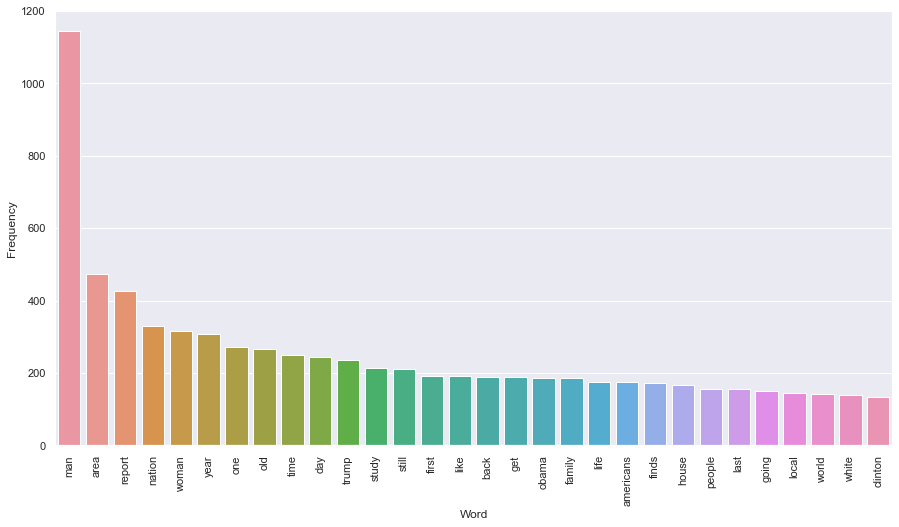

In [29]:
plt.figure(figsize = (15,8))
plot = sns.barplot (x = df_sarcasm.iloc[:30].Word , y = df_sarcasm.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

# Stemmize

I will make the stemming transformation grouping the words to its respectives roots

In [30]:
dataset2 = pd.read_json('Downloads\sarcasm_dataset\Sarcasm_Headlines_Dataset.json' , lines = True)
dataset2.sample(10)

,article_link,headline,is_sarcastic
8765,https://www.theonion.com/christ-to-wed-longtim...,christ to wed longtime backup singer,1
12852,https://entertainment.theonion.com/struggling-...,struggling don rickles has nothing but nice th...,1
14607,https://www.huffingtonpost.com/entry/legal-sys...,legal systems have reinforced discrimination a...,0
15490,https://www.huffingtonpost.comhttp://www.nj.co...,"welcome to herointown, new jersey's 4th-larges...",0
11512,https://politics.theonion.com/biden-s-buffalo-...,biden's buffalo wing challenge dinner not sitt...,1
7682,https://www.huffingtonpost.com/entry/locating-...,this is how to locate lost life insurance poli...,0
2574,https://www.huffingtonpost.com/entry/terrorism...,how fear of terrorism may put you at risk of l...,0
2318,https://www.huffingtonpost.com/entry/house-int...,"following trump's lead, gop shifts from russia...",0
11438,https://www.huffingtonpost.com/entry/greeces-r...,"greece's rock portrait gallery, from craggy og...",0
5882,https://www.huffingtonpost.com/entry/franchesc...,franchesca ramsey's retirement home for trump ...,0


I think that the unique important column is 'headline' and 'is_sarcastic' so I will drop out 'article_link'

In [31]:
dataset2 = pd.concat([dataset2.headline , dataset2.is_sarcastic] , axis = 1)
dataset2.dropna( axis = 0 , inplace = True )
dataset2.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


Before stemming process I will normalize taking out the characters that are not words 

In [32]:
import re

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [33]:
headline_list = []

for headder in dataset2.headline:
    
    # Replacing special characters to spaces
    headder = re.sub('[^a-zA-Z]' , ' ', str(headder))
    
    # All words into lower case
    headder = headder.lower()
    
    # Tokenize words
    headder = nltk.word_tokenize(headder)
    
    # I think deleting words less than 3 lyrics
    headder = [word for word in headder if len(word) > 3]
    
    # Taking out stopwords
    headder = [word for word in headder if not word in stopwords]
    
    # Now stemmize it
    
    # I will applay the function seeking the roots' words
    headder = [stemmer.stem(word) for word in headder]
    
    # For last, joining headline
    headline_list.append(headder)
    

I am going to create a new column into dataset with the stemmized headlines

In [34]:
dataset2['stem_headline'] = headline_list
dataset2.tail()

,headline,is_sarcastic,stem_headline
26704,american politics in moral free-fall,0,"[american, polit, moral, free, fall]"
26705,america's best 20 hikes,0,"[america, best, hike]"
26706,reparations and obama,0,"[repar, obama]"
26707,israeli ban targeting boycott supporters raise...,0,"[isra, target, boycott, support, rais, alarm, ..."
26708,gourmet gifts for the foodie 2014,0,"[gourmet, gift, foodi]"


Secondly, I will make a new dataset named 'dataset_stem' that contains only 'steam_headline' and 'is_sarcastic' columns

In [35]:
dataset_stem = pd.concat([dataset2.stem_headline , dataset.is_sarcastic], axis = 1)
dataset_stem.dropna(axis = 0 , inplace = True) # Just in case if there are empty headlines
dataset_stem.head()

,stem_headline,is_sarcastic
0,"[former, versac, store, clerk, sue, secret, bl...",0.0
1,"[roseann, reviv, catch, thorni, polit, mood, b...",0.0
2,"[start, fear, seri, closest, thing, grandchild]",1.0
3,"[boehner, want, wife, listen, come, altern, de...",1.0
4,"[rowl, wish, snape, happi, birthday, magic]",0.0


# Lemmatize

At this point, I will try use lemmatizer but it costs me computing resources even it will completely enhance the roots' words so let's see it 

In [36]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
wordnet_lemmatizer = WordNetLemmatizer()

In [172]:
dataset3 = pd.read_json('Downloads\sarcasm_dataset\Sarcasm_Headlines_Dataset.json' , lines = True)

dataset3 = pd.concat([dataset3.headline , dataset3.is_sarcastic] , axis = 1)

dataset3.dropna(axis = 0 , inplace = True)

I will define a function to traduce the values' tags to POS's values that lemmatizer may understand

In [173]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [174]:
headder3_list=[]
for headder3 in dataset3.headline:
     # Replacing characters
    headder3=re.sub("[^a-zA-Z]"," ",str(headder3))
    # lower case
    headder3=headder3.lower()
    # Tokenize
    headder3=nltk.word_tokenize(headder3)
    
     # Applying lemmatize
    phrase_lemma = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in headder3]
    
    
    # Dropping out words less than 3 lyrics
    headder3 = [word for word in headder3 if len(word)>3]
    # Dropping out Stopwords
    headder3 = [word for word in headder3 if not word in stopwords]
    
    # For last, joining headlines
    headder3=" ".join(headder3)
    
    headder3_list.append(headder3)

I am going to create a new column into dataset with the lemmatized headlines

In [175]:
dataset3["lemma_headline"] = headder3_list
dataset3.tail()

,headline,is_sarcastic,lemma_headline
26704,american politics in moral free-fall,0,american politics moral free fall
26705,america's best 20 hikes,0,america best hikes
26706,reparations and obama,0,reparations obama
26707,israeli ban targeting boycott supporters raise...,0,israeli targeting boycott supporters raises al...
26708,gourmet gifts for the foodie 2014,0,gourmet gifts foodie


Finally, I will make a new dataset named 'dataset_lemma' that contains only 'lemma_headline' and 'is_sarcastic' columns

In [176]:
dataset_lemm = pd.concat([dataset3.lemma_headline,dataset3.is_sarcastic],axis=1)
dataset_lemm.dropna(axis=0,inplace=True)  # # Just in case if there are empty headlines
dataset_lemm.head()

,lemma_headline,is_sarcastic
0,former versace store clerk sues secret black c...,0
1,roseanne revival catches thorny political mood...,0
2,starting fear series closest thing grandchild,1
3,boehner wants wife listen come alternative deb...,1
4,rowling wishes snape happy birthday magical,0


Well, there was a completely exausting lemmatized process dued the consumed time while the internal computing operations was working and I have had to install several NLTK's packages even I will compare the lemmatized and stemmized dataset just for if exists some diferences according its POS's comprehension.

In [184]:
print(dataset_stem.head(2))
print(dataset_lemm.head(2))

                                       stem_headline  is_sarcastic
0  [former, versac, store, clerk, sue, secret, bl...           0.0
1  [roseann, reviv, catch, thorni, polit, mood, b...           0.0
                                      lemma_headline  is_sarcastic
0  former versace store clerk sues secret black c...             0
1  roseanne revival catches thorny political mood...             0


Definitely I can comprove that lemmatized process boost a lot the extractions' words making it a better understanding context.

# Vectorize 

I will use the lemmatized dataset and I need to convert every headline into vector where appears a 1 or 0 if contains it.

In [178]:
head_list = list(dataset_lemm['lemma_headline'].values)

is_sarc = dataset_lemm['is_sarcastic'].values

In [179]:
from sklearn.feature_extraction.text import CountVectorizer

# I will use only the 1000 mostly frequency words troughout corpus to generate the vectors
max_features=1000

# # Which every instance will has 1000 features
cou_vec=CountVectorizer(max_features=max_features)

Furthermore, I guess the deduction to work with the mostly repeated words because these will give me more information than others.

In [185]:
headline_matrix = cou_vec.fit_transform(head_list)

# Take the words
all_words = cou_vec.get_feature_names_out()


print('The 50 most used words: ' ,all_words[0:50])

The 50 most used words:  ['abortion' 'abuse' 'accidentally' 'according' 'accused' 'across' 'action'
 'activists' 'actor' 'actually' 'address' 'adds' 'administration' 'admits'
 'adorable' 'advice' 'afghanistan' 'ahead' 'airport' 'album' 'allegations'
 'almost' 'already' 'also' 'always' 'amazing' 'amazon' 'america'
 'american' 'americans' 'amid' 'among' 'anniversary' 'announce'
 'announces' 'another' 'anti' 'anyone' 'anything' 'apartment' 'apologizes'
 'apparently' 'apple' 'archives' 'area' 'around' 'arrested' 'artist'
 'asked' 'asking']


# Modeling

Everything is done for working with a definitive new dataset and start the modeling process

Train - Test:

In [181]:
x = headline_matrix.toarray()
y = is_sarc

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

Define a function that allows me plot the results in a confusion matrix

In [196]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["No Sarcastic","Sarcastic"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

# Naive Bayes


I just start with a simple Naive Bayes to get a reference benchmark model for accuracy

In [197]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.6800823661549982


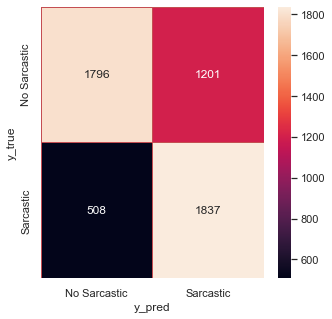

In [198]:
y_pred = nb.predict(xtest)
confusion(ytest , y_pred)

In [200]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred, target_names=['No_sarcastic' , 'Sarcastic']))

              precision    recall  f1-score   support

No_sarcastic       0.78      0.60      0.68      2997
   Sarcastic       0.60      0.78      0.68      2345

    accuracy                           0.68      5342
   macro avg       0.69      0.69      0.68      5342
weighted avg       0.70      0.68      0.68      5342



I may say that the most viable evaluating metric is f1-score give me an equilibrated punctuation even though there were more 'No_Sarcastic' data than 'Sarcastic'

# Random Forest

In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 150 , random_state = 42)
rf.fit(xtrain , ytrain)
print('acc: ' , rf.score(xtest , ytest))

acc:  0.7141520029951329


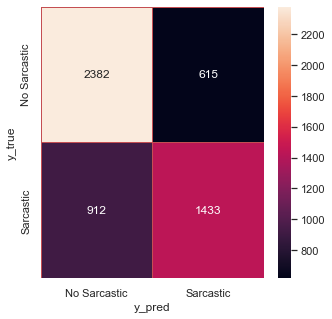

In [204]:
y_pred=rf.predict(xtest)
confusion(ytest,y_pred)

Here I have an unbalanced demostration in the confusion matrix with Random Forest in favor to 'No Sarcastic' identification than 'Sarcastic'.

I am interested to know the importance of features that Random Forest has used to considered this score...

C:\Users\Angel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


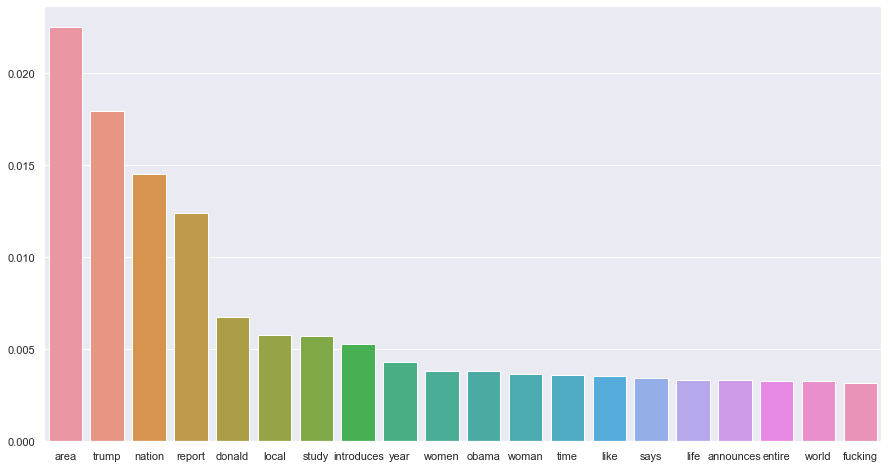

In [205]:
# I ask the importance for every feature
importances = rf.feature_importances_
# Take the list of words
all_words = cou_vec.get_feature_names()
columns = all_words

# Order the importance and take the 20
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Graphic
plt.figure(figsize = (15,8))
sns.barplot(selected_columns, selected_importances)
plt.show()

Area, Trump and Nation are the words that has a great impact in the RF process modeling

# SVM

I will see with a SVM model beacause the number features is comparable to the number of istances:

In [206]:
# I preffer to use Linear SVM. 
# For Linear Kernel, this function is fastest than traditional SVC.
from sklearn.svm import LinearSVC

svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)
svc.score(xtest,ytest)

0.729127667540247

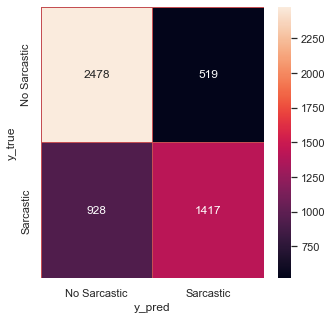

In [207]:
y_pred=svc.predict(xtest)
confusion(ytest,y_pred)

Despite applying Linear SVM, I confirm that keeps unbalanced as Random Forest Model with 'No Sarcastic' in place of 'Sarcastic' texts.

# Final considerations

I might considered a more efficient model using F1-Score because such as I  previously checked its respective confusion matrix the real 'No Sarcastic' and 'Sarcastic' comments are taken and equality in a balanced way between themselves and there are a minimal retenction of falses negatives and falses positives. Above all, the F1 - Scores is the perfect metric in this special case for calibrating bynaries values and maintaining an optimal neutral separation. 